# Initial Python Setup

In [72]:
import pandas as pd
import requests as req
import os
import numpy as np
import statsmodels.api as api
import statsmodels.formula.api as smf

from matplotlib import pyplot as plt

from zipfile import ZipFile
from io import BytesIO
from IPython.display import display

# Setting Variables
Here we are just setting variables (such as the url, file name, etc) to tidy up the importing code

In [73]:
url = 'https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2022.zip'
file_name = 'survey_results_public.csv'

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 75)

# Importing the Dataset

In [74]:
response = req.get(url)
zip_file = ZipFile(BytesIO(response.content))
df = pd.read_csv(BytesIO(zip_file.read(file_name)))
display(df)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,NaN,NaN,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom

,ConvertedCompYearly,Currency,CompTotal,CompFreq
0,NaN,NaN,NaN,NaN
1,NaN,CAD\tCanadian dollar,NaN,NaN
2,40205.0,GBP\tPound sterling,32000.0,Yearly
3,215232.0,ILS\tIsraeli new shekel,60000.0,Monthly
4,NaN,USD\tUnited States dollar,NaN,NaN
...,...,...,...,...
73263,NaN,USD\tUnited States dollar,60000.0,Yearly
73264,NaN,USD\tUnited States dollar,107000.0,Yearly
73265,NaN,USD\tUnited States dollar,NaN,NaN
73266,NaN,GBP\tPound sterling,58500.0,Yearly


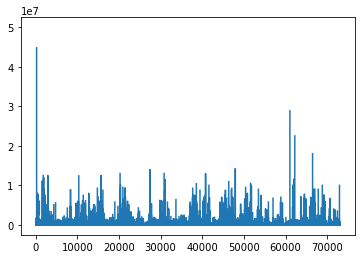

In [75]:
display(df[["ConvertedCompYearly", "Currency", "CompTotal", "CompFreq"]])
plt.plot(df["ConvertedCompYearly"])

# Cleaning the Data

In order to use this dataset, we will need to clean it up and interpret some of the variables

## Dummy Variables

Many of the variables in the data are multi-selected lists, where the user can choose none, any, or all of the options. These are stored as a list seperated by a `;` deliminer.

We can use the dataframe method

```python
df.str.get_dummies(';')
```

to split these up into dummy variables

In [76]:
dummy_languages = df["LanguageHaveWorkedWith"].str.get_dummies(';').rename(columns={
  "C#": "CSharp",
  "F#": "FSharp",
  "Bash/Shell": "Bash",
  "HTML/CSS": "HTML",
  "Objective-C": "ObjectiveC"
})
dummy_learncodeoffline = df["LearnCode"].str.get_dummies(";").add_prefix("Learn From ")
dummy_learncodeonline = df["LearnCodeOnline"].str.get_dummies(";").add_prefix("Learn From ")
dummy_devtype = df["DevType"].str.get_dummies(";").add_prefix("Dev Type: ")
dummy_employment = df["Employment"].str.get_dummies(";").add_prefix("Employment: ")

df = pd.concat([df,dummy_languages, dummy_learncodeoffline, dummy_learncodeonline, dummy_devtype, dummy_employment], axis = 1)
display(df)
# have descriptives: salary distribution, counts for languages, how many full time, etc.

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly,APL,Assembly,Bash,C,CSharp,C++,COBOL,Clojure,Crystal,Dart,Delphi,Elixir,Erlang,FSharp,Fortran,Go,Groovy,HTML,Haskell,Java,JavaScript,Julia,Kotlin,LISP,Lua,MATLAB,OCaml,ObjectiveC,PHP,Perl,PowerShell,Python,R,Ruby,Rust,SAS,SQL,Scala,Solidity,Swift,TypeScript,VBA,Learn From Books / Physical media,Learn From Coding Bootcamp,Learn From Colleague,Learn From Friend or family member,Learn From Hackathons (virtual or in-person),Learn From On the job training,Learn From Online Courses or Certification,Learn From Other (please specify):,"Learn From Other online resources (e.g., videos, blogs, forum)","Learn From School (i.e., University, College, etc)","Learn From Auditory material (e.g., podcasts)",Learn From Blogs,Learn From Certification videos,Learn From Coding sessions (live or recorded),Learn From How-to videos,Learn From Interactive tutorial,Learn From Online books,"Learn From Online challenges (e.g., daily or weekly coding challenges)",Learn From Online forum,Learn From Other (Please specify):,Learn From Programming Games,Learn From Stack Overflow,Learn From Technical documentation,Learn From Video-based Online Courses,Learn From Written Tutorials,Learn From Written-based Online Courses,Dev Type: Academic researcher,Dev Type: Blockchain,Dev Type: Cloud infrastructure engineer,Dev Type: Data or business analyst,Dev Type: Data scientist or machine learning specialist,Dev Type: Database administrator,Dev Type: Designer,Dev Type: DevOps specialist,"Dev Type: Developer, QA or test","Dev Type: Developer, back-end","Dev Type: Developer, desktop or enterprise applications","Dev Type: Developer, embedded applications or devices","Dev Type: Developer, front-end","Dev Type: Developer, full-stack","Dev Type: Developer, game or graphics","Dev Type: Developer, mobile",Dev Type: Educator,"Dev Type: Engineer, data","Dev Type: Engineer, site reliability",Dev Type: Engineering manager,Dev Type: Marketing or sales professional,Dev Type: Other (please specify):,Dev Type: Product manager,Dev Type: Project manager,Dev Type: Scientist,Dev Type: Security professional,"Dev Type: Senior Executive (C-Suite, VP, etc.)",Dev Type: Student,Dev Type: System administrator,"Employment: Employed, full-time","Employment: Employed, part-time",Employment: I prefer not to say,"Employment: Independent contractor, freelancer, or self-employed","Employment: Not employed, and not looking for work","Employment: Not employed, but looking for work",Employment: Retired,"Employment: Student, full-time","Employment: Student, part-time"
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [89]:
list(dummy_employment.columns)

['Employment: Employed, full-time',
 'Employment: Employed, part-time',
 'Employment: I prefer not to say',
 'Employment: Independent contractor, freelancer, or self-employed',
 'Employment: Not employed, and not looking for work',
 'Employment: Not employed, but looking for work',
 'Employment: Retired',
 'Employment: Student, full-time',
 'Employment: Student, part-time']

In [77]:
display(df[list(dummy_learncodeoffline.columns) + list(dummy_learncodeonline.columns)])

,Learn From Books / Physical media,Learn From Coding Bootcamp,Learn From Colleague,Learn From Friend or family member,Learn From Hackathons (virtual or in-person),Learn From On the job training,Learn From Online Courses or Certification,Learn From Other (please specify):,"Learn From Other online resources (e.g., videos, blogs, forum)","Learn From School (i.e., University, College, etc)","Learn From Auditory material (e.g., podcasts)",Learn From Blogs,Learn From Certification videos,Learn From Coding sessions (live or recorded),Learn From How-to videos,Learn From Interactive tutorial,Learn From Online books,"Learn From Online challenges (e.g., daily or weekly coding challenges)",Learn From Online forum,Learn From Other (Please specify):,Learn From Programming Games,Learn From Stack Overflow,Learn From Technical documentation,Learn From Video-based Online Courses,Learn From Written Tutorials,Learn From Written-based Online Courses
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,1,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,1,0
73264,0,0,0,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,1,1,1,0
73265,1,0,0,0,0,0,1,0,1,1,0,0,1,1,1,0,1,0,0,0,1,1,1,1,0,1
73266,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Looking at when any of the currency variables are NaN or not NaN

In [78]:
display(df[df["ConvertedCompYearly"].isna()][df["CompTotal"].notna()][["ConvertedCompYearly", "Currency", "CompTotal", "CompFreq"]])

/tmp/ipykernel_254224/3171790120.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df[df["ConvertedCompYearly"].isna()][df["CompTotal"].notna()][["ConvertedCompYearly", "Currency", "CompTotal", "CompFreq"]])


,ConvertedCompYearly,Currency,CompTotal,CompFreq
412,NaN,USD\tUnited States dollar,0.0,Yearly
535,NaN,CAD\tCanadian dollar,73666.0,NaN
1153,NaN,EUR European Euro,0.0,Yearly
1294,NaN,USD\tUnited States dollar,215000.0,NaN
1606,NaN,INR\tIndian rupee,25.0,Yearly
...,...,...,...,...
73259,NaN,PLN\tPolish zloty,8000.0,Monthly
73261,NaN,EUR European Euro,36000.0,Yearly
73263,NaN,USD\tUnited States dollar,60000.0,Yearly
73264,NaN,USD\tUnited States dollar,107000.0,Yearly


In [79]:
display(df[df["ConvertedCompYearly"].notna()][["ConvertedCompYearly", "Currency", "CompTotal", "CompFreq"]])

,ConvertedCompYearly,Currency,CompTotal,CompFreq
2,40205.0,GBP\tPound sterling,32000.0,Yearly
3,215232.0,ILS\tIsraeli new shekel,60000.0,Monthly
8,49056.0,EUR European Euro,46000.0,Yearly
10,60307.0,GBP\tPound sterling,48000.0,Yearly
11,194400.0,USD\tUnited States dollar,194400.0,Yearly
...,...,...,...,...
73116,115000.0,USD\tUnited States dollar,115000.0,Yearly
73118,57720.0,NGN\tNigerian naira,2000000.0,Monthly
73119,70000.0,USD\tUnited States dollar,70000.0,Yearly
73120,35192.0,EUR European Euro,33000.0,Yearly


In [80]:
display(df[df["ConvertedCompYearly"].notna()][df["Currency"] == "USD\tUnited States dollar"][["ConvertedCompYearly", "Currency", "CompTotal", "CompFreq"]])

/tmp/ipykernel_254224/3544414874.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df[df["ConvertedCompYearly"].notna()][df["Currency"] == "USD\tUnited States dollar"][["ConvertedCompYearly", "Currency", "CompTotal", "CompFreq"]])


,ConvertedCompYearly,Currency,CompTotal,CompFreq
11,194400.0,USD\tUnited States dollar,194400.0,Yearly
12,65000.0,USD\tUnited States dollar,65000.0,Yearly
14,110000.0,USD\tUnited States dollar,110000.0,Yearly
26,106960.0,USD\tUnited States dollar,106960.0,Yearly
28,130000.0,USD\tUnited States dollar,130000.0,Yearly
...,...,...,...,...
73106,50000.0,USD\tUnited States dollar,50000.0,Yearly
73111,115000.0,USD\tUnited States dollar,115000.0,Yearly
73113,94000.0,USD\tUnited States dollar,94000.0,Yearly
73116,115000.0,USD\tUnited States dollar,115000.0,Yearly


## Filtering to United States


In [81]:
df1 = df[df["Country"] == "United States of America"]
display(df1)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly,APL,Assembly,Bash,C,CSharp,C++,COBOL,Clojure,Crystal,Dart,Delphi,Elixir,Erlang,FSharp,Fortran,Go,Groovy,HTML,Haskell,Java,JavaScript,Julia,Kotlin,LISP,Lua,MATLAB,OCaml,ObjectiveC,PHP,Perl,PowerShell,Python,R,Ruby,Rust,SAS,SQL,Scala,Solidity,Swift,TypeScript,VBA,Learn From Books / Physical media,Learn From Coding Bootcamp,Learn From Colleague,Learn From Friend or family member,Learn From Hackathons (virtual or in-person),Learn From On the job training,Learn From Online Courses or Certification,Learn From Other (please specify):,"Learn From Other online resources (e.g., videos, blogs, forum)","Learn From School (i.e., University, College, etc)","Learn From Auditory material (e.g., podcasts)",Learn From Blogs,Learn From Certification videos,Learn From Coding sessions (live or recorded),Learn From How-to videos,Learn From Interactive tutorial,Learn From Online books,"Learn From Online challenges (e.g., daily or weekly coding challenges)",Learn From Online forum,Learn From Other (Please specify):,Learn From Programming Games,Learn From Stack Overflow,Learn From Technical documentation,Learn From Video-based Online Courses,Learn From Written Tutorials,Learn From Written-based Online Courses,Dev Type: Academic researcher,Dev Type: Blockchain,Dev Type: Cloud infrastructure engineer,Dev Type: Data or business analyst,Dev Type: Data scientist or machine learning specialist,Dev Type: Database administrator,Dev Type: Designer,Dev Type: DevOps specialist,"Dev Type: Developer, QA or test","Dev Type: Developer, back-end","Dev Type: Developer, desktop or enterprise applications","Dev Type: Developer, embedded applications or devices","Dev Type: Developer, front-end","Dev Type: Developer, full-stack","Dev Type: Developer, game or graphics","Dev Type: Developer, mobile",Dev Type: Educator,"Dev Type: Engineer, data","Dev Type: Engineer, site reliability",Dev Type: Engineering manager,Dev Type: Marketing or sales professional,Dev Type: Other (please specify):,Dev Type: Product manager,Dev Type: Project manager,Dev Type: Scientist,Dev Type: Security professional,"Dev Type: Senior Executive (C-Suite, VP, etc.)",Dev Type: Student,Dev Type: System administrator,"Employment: Employed, full-time","Employment: Employed, part-time",Employment: I prefer not to say,"Employment: Independent contractor, freelancer, or self-employed","Employment: Not employed, and not looking for work","Employment: Not employed, but looking for work",Employment: Retired,"Employment: Student, full-time","Employment: Student, part-time"
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,"De

In [82]:
display(df1[["Currency","ConvertedCompYearly","CompFreq"]][(df1["Currency"] != "USD\tUnited States dollar" ) & (df1["Currency"].notna())])

,Currency,ConvertedCompYearly,CompFreq
10634,KYD\tCayman Islands dollar,275866.0,Yearly
13560,EUR European Euro,NaN,Monthly
24939,OMR\tOmani rial,21768.0,Monthly
37089,AUD\tAustralian dollar,8.0,Yearly
39733,INR\tIndian rupee,NaN,Monthly
43494,CAD\tCanadian dollar,NaN,Monthly
53694,BMD\tBermudian dollar,NaN,NaN
54432,TND\tTunisian dinar,75850.0,Weekly
59590,CAD\tCanadian dollar,93701.0,Yearly
63663,UGX\tUgandan shilling,49.0,Yearly


## Filtering to only USD

In [83]:
df2 = df1[df1["Currency"] == "USD\tUnited States dollar"]
display(df2[["Currency","ConvertedCompYearly","CompFreq","CompTotal"]])

,Currency,ConvertedCompYearly,CompFreq,CompTotal
4,USD\tUnited States dollar,NaN,NaN,NaN
11,USD\tUnited States dollar,194400.0,Yearly,194400.0
12,USD\tUnited States dollar,65000.0,Yearly,65000.0
14,USD\tUnited States dollar,110000.0,Yearly,110000.0
26,USD\tUnited States dollar,106960.0,Yearly,106960.0
...,...,...,...,...
73229,USD\tUnited States dollar,NaN,Yearly,325000.0
73240,USD\tUnited States dollar,NaN,NaN,NaN
73254,USD\tUnited States dollar,NaN,Yearly,115000.0
73264,USD\tUnited States dollar,NaN,Yearly,107000.0


In [84]:
display(df2[["Currency","ConvertedCompYearly","CompFreq","CompTotal"]][df2["ConvertedCompYearly"].isna() & (df2["CompTotal"].notna()) & df2["CompFreq"].notna()])

,Currency,ConvertedCompYearly,CompFreq,CompTotal
412,USD\tUnited States dollar,NaN,Yearly,0.000000e+00
3068,USD\tUnited States dollar,NaN,Weekly,1.000000e+52
13858,USD\tUnited States dollar,NaN,Monthly,0.000000e+00
19457,USD\tUnited States dollar,NaN,Yearly,0.000000e+00
22173,USD\tUnited States dollar,NaN,Yearly,0.000000e+00
22231,USD\tUnited States dollar,NaN,Yearly,0.000000e+00
24852,USD\tUnited States dollar,NaN,Yearly,0.000000e+00
27915,USD\tUnited States dollar,NaN,Yearly,0.000000e+00
31190,USD\tUnited States dollar,NaN,Monthly,1.000000e+12
35909,USD\tUnited States dollar,NaN,Yearly,0.000000e+00


# Not filtering for USD, but filtering to United States where ConvertedCompYearly is not NaN

,ConvertedCompYearly,EdLevel,APL,Assembly,Bash,C,CSharp,C++,COBOL,Clojure,Crystal,Dart,Delphi,Elixir,Erlang,FSharp,Fortran,Go,Groovy,HTML,Haskell,Java,JavaScript,Julia,Kotlin,LISP,Lua,MATLAB,OCaml,ObjectiveC,PHP,Perl,PowerShell,Python,R,Ruby,Rust,SAS,SQL,Scala,Solidity,Swift,TypeScript,VBA,Dev Type: Academic researcher,Dev Type: Blockchain,Dev Type: Cloud infrastructure engineer,Dev Type: Data or business analyst,Dev Type: Data scientist or machine learning specialist,Dev Type: Database administrator,Dev Type: Designer,Dev Type: DevOps specialist,"Dev Type: Developer, QA or test","Dev Type: Developer, back-end","Dev Type: Developer, desktop or enterprise applications","Dev Type: Developer, embedded applications or devices","Dev Type: Developer, front-end","Dev Type: Developer, full-stack","Dev Type: Developer, game or graphics","Dev Type: Developer, mobile",Dev Type: Educator,"Dev Type: Engineer, data","Dev Type: Engineer, site reliability",Dev Type: Engineering manager,Dev Type: Marketing or sales professional,Dev Type: Other (please specify):,Dev Type: Product manager,Dev Type: Project manager,Dev Type: Scientist,Dev Type: Security professional,"Dev Type: Senior Executive (C-Suite, VP, etc.)",Dev Type: Student,Dev Type: System administrator
11,194400.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
12,65000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,110000.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,106960.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28,130000.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73105,120000.0,Some college/university study without earning ...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73111,115000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73113,94000.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73116,115000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+01, 9.000e+00,
        5.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
        5.000e+00, 4.000e+00, 1.700e+01, 2.400e+01, 6.300e+01, 2.980e+02,
        1.335e+03, 3.265e+03, 2.425e+03, 5.160e+02, 1.800e+02, 7.600e+01]),
 array([ 0.        ,  0.46038342,  0.92076684,  1.38115025,  1.84153367,
         2.30191709,  2.76230051,  3.22268393,  3.68306734,  4.14345076,
         4.60383418,  5.0642176 ,  5.52460101,  5.98498443,  6.44536785,
         6.90575127,  7.36613469,  7.8265181 ,  8.28690152,  8.74728494,
         9.20766836,  9.66805178, 10.12843519, 10.58881861, 11.04920203,
        11.50958545, 11.96996887, 12.43035228, 12.8907357 , 13.35111912,
        13.81150254]),
 <BarContainer object of 30 artists>)

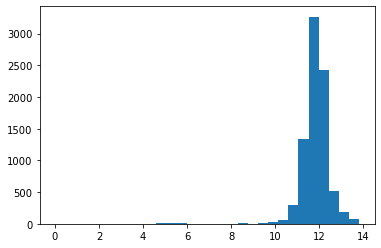

In [85]:
# so the converted year comp total is just like, taking out all of the excess values
df3 = df1[df1["ConvertedCompYearly"].notna()]
display(df3[["ConvertedCompYearly","EdLevel"] + list(dummy_languages.columns) + list(dummy_devtype.columns)])
plt.hist(np.log(df3["ConvertedCompYearly"][df3["ConvertedCompYearly"] < 1_000_000]), bins = 30)

In [86]:
# if not os.path.exists("tmp"):
#  os.mkdir("tmp")
# df_out = df3[["ConvertedCompYearly","EdLevel"] + list(dummy_languages.columns) + list(dummy_devtype.columns)]
#df_out.to_csv(os.path.join("tmp","data_out.csv"))
# graph non-log and log
# run log on compensation as left hand


start with simple log(income) ~ language
more regressions after adding in control variables

devtype, employment status, education, etc.
Years of professional experience


In [87]:

regression = smf.ols(f'np.log(ConvertedCompYearly) ~ {" + ".join(list(dummy_languages.columns))}', data = df3).fit()
print(regression.summary())

                                 OLS Regression Results                                
Dep. Variable:     np.log(ConvertedCompYearly)   R-squared:                       0.028
Model:                                     OLS   Adj. R-squared:                  0.024
Method:                          Least Squares   F-statistic:                     6.141
Date:                         Thu, 15 Dec 2022   Prob (F-statistic):           1.49e-31
Time:                                 15:14:01   Log-Likelihood:                -12184.
No. Observations:                         8707   AIC:                         2.445e+04
Df Residuals:                             8665   BIC:                         2.475e+04
Df Model:                                   41                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------